# Audio with numpy unsolved

### Basic of numpy and music

numpy is a python library for **veector** (also higher-dimensional analos: matrix, tensor) computatinos modelled after matlab.

we will use numpy.array's which work similarly to lists (len, indexing etc), but they really behave like mathematical vectors in terms of (*, +)

we'll also look at:
* np.pi
* adding an np.array by a scalar, multiplying by another vector
* np.concatenate
* np.linspace, np.zeros, np.ones
* np.sin, np.cos, np.sqrt, np.log...
* np.max, np.min



#### an applicaton
represnt data as vectors

try to **compose music**

### Importing numpy and accessing its contents

In [ ]:
import numpy as np # we import the numpy package and give it an alias (name)

In [3]:
np.pi, np.cos(0)

(3.141592653589793, np.float64(1.0))

### Basics of np.arrays

> We'll often use them for mathematical vectors. Below $u,v \in \mathbb{R}^4$.

Sometimes you will create np.arrays from lists/tuples

In [10]:
u = np.array([1., 2, 3, 10]) # if you want floats, >= element should be a float!
v = np.array([100.0, 200, 300, 500])

print(u)
print(v)
print(u+v) # let's try some more! what does u*v do? what else can we do?
print(u*v)

[ 1.  2.  3. 10.]
[100. 200. 300. 500.]
[101. 202. 303. 510.]
[ 100.  400.  900. 5000.]


In [16]:
v.dtype

# data types (dtype):
# numpy arrays are homogenous, meaning every element in the array must be the same type. 
# v.dtype returned float 64. this happened because even one decimal point (like 100.0)
# tells numpy to treat the whole array as floating point numvers for precision.


dtype('float64')

In [12]:
u

array([ 1.,  2.,  3., 10.])

In [13]:
v*u + 3*v - u - v

array([ 299.,  798., 1497., 5990.])

In [14]:
v*u

array([ 100.,  400.,  900., 5000.])

In [18]:
len(u)

4

In [21]:
u.shape

# shape tells you the dimensinoality of the array.
# the 5 means there are four elements in that directon.
# the comma with nothing after indicates this is a 1D array (a simple vector)

(4,)

In [22]:
u[0], u[-1], u[:2], u[-2:]

# u[0] : first element
# u[-1]: last element
# u[:2]: slice (start): grab everything up to (but not incldueing index 2)
# u[-2:] slice (end): grab everything from the second-to-last element to the end

(np.float64(1.0), np.float64(10.0), array([1., 2.]), array([ 3., 10.]))

In [24]:
u[:2] = 0 # we can also change a sub-arrray, useful!
u   # that means slice (start) to index 2 > zero!

array([ 0.,  0.,  3., 10.])

### Arrays of ones and zeros
it's often useful to have a large array of zeros or ones, so that you can do something to them.

In [25]:
np.ones(10), np.zeros(10)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

#### np.linspace (super useful)

used to create n numbers evenly spaced between a and b (inclusive)
> it also works if a and b are np.arrays/vectors

In [26]:
xs = np.linspace(0, np.pi, 10**6)
print(xs, len(xs))

[0.00000000e+00 3.14159580e-06 6.28319159e-06 ... 3.14158637e+00
 3.14158951e+00 3.14159265e+00] 1000000


### Applying functions on np.arrays

If we apply a mathematical function $f : \mathbb{R} \to \mathbb{R}$ to a vector in $\mathbb{R}^n$, numpy will automatically compute $f$ on each component of this vector.

> As we'll see in a moment, this is *much* more efficient than doing a list comprehension!

In [27]:
values = np.sin(xs) # [sin(xs[0]), sin(xs[1]), ...]

In [28]:
len(values)

1000000

In [29]:
values

array([0.00000000e+00, 3.14159580e-06, 6.28319159e-06, ...,
       6.28319159e-06, 3.14159580e-06, 1.22464680e-16], shape=(1000000,))

### Summing etc

In [30]:
# np.sum(np.sin(xs))
np.sum(values)

np.float64(636619.1357472853)

### Extra (timings)!
> we can use % timeit to time an expression, note that it runs the code many times, so it seems it's slower.

ms is 1 thousandth of a second µs is 1 millionth of a second!

In [31]:
len(xs) / 1e6

1.0

In [32]:
%timeit np.sin(xs)

3.12 ms ± 24.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
%timeit [np.sin(x) for x in xs]

358 ms ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
import math # using library-math python!

In [35]:
%timeit [math.sin(x) for x in xs]

61.7 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
%timeit sum(xs)

34.3 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
%timeit np.sum(xs)

180 μs ± 2.63 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Note that above is:

* ~ 75x faster than using np.sin in list comprehension (np.sin is really optimized for working on np.arrays not single numbers!)
* ~ 10x faster than using math.sin in list comprehension 

### Concatenating ('chaining')

we can put one vector after another using the np.concatenate function
> note that the function takes a tuple of np.arrays

In [39]:
c = np.concatenate((u,v,u,u,v,v)) # takes tuple of vectors / np.arrays
# if c = np.concatenate(u,v,u,u,v,v) > errors
print(u,v,c)

[ 0.  0.  3. 10.] [100. 200. 300. 500.] [  0.   0.   3.  10. 100. 200. 300. 500.   0.   0.   3.  10.   0.   0.
   3.  10. 100. 200. 300. 500. 100. 200. 300. 500.]


### Making noise

an np.array representing a sine wave can be interpreted as sound. yu can actually play it below.

* try to generate some tones, add them together, multiply by a scalar etc.
* you can also use np.concatenate many basic tones to create longer vectors representing sounds 
* you can also mix these longer sounds etc.


This could help: https://en.wikipedia.org/wiki/Piano_key_frequencies



In [47]:
# Don't mind the things below too much, you'll just be using the functions
from IPython.display import Audio

TIMESTEPS_PER_SECOND = 20_000

# sample rate. this is a set to 20,000. it means for every 1 second of audio, there are 20,000 individuals numbers in the array

def make_tone(freq, duration_in_sec=1.): # make tone (freq, duration): it creates a time axis(ts) using np.linspace
  ts = np.linspace(0, np.pi*2 * duration_in_sec,
                   int(TIMESTEPS_PER_SECOND * duration_in_sec))
  return np.sin(ts * freq)

def play_sound(sound): # play_sound(sound): this uses the Ipython.display.Audio widget to turn that array of numbers into a plyable audio file inyour browser
  return Audio(sound, rate=TIMESTEPS_PER_SECOND)

In [41]:
c_4_freq = 261.63	 # some C sound

c_sound = make_tone(c_4_freq, 1)

#step 1: c_sound = make_tone(n * c_4_freq, 1)
#step 2: change the number n
#step 3: if n = 0.5, n = 3.5 ? how they different?
#step 4: duration 1? What about 10?

# this must be the last thing in a cell you do, for some reason
play_sound(c_sound)

#play_sound(c_sound/arbitrary number)

In [48]:
play_sound(np.concatenate((c_sound, c_sound*2, c_sound/2)))

# volume of the sound

In [43]:
type(c_sound) #could be n dimentional > numpy.ndarray

numpy.ndarray

In [44]:
c_sound[:100]

array([ 0.        ,  0.08210507,  0.16365571,  0.24410125,  0.32289845,
        0.39951524,  0.47343425,  0.54415632,  0.6112039 ,  0.67412424,
        0.73249246,  0.78591442,  0.83402938,  0.87651244,  0.91307673,
        0.94347533,  0.96750299,  0.98499744,  0.99584056,  0.99995912,
        0.99732532,  0.98795694,  0.97191723,  0.94931452,  0.92030143,
        0.88507387,  0.84386972,  0.79696723,  0.7446831 ,  0.68737039,
        0.62541611,  0.55923863,  0.4892848 ,  0.41602702,  0.33995994,
        0.26159725,  0.18146808,  0.10011352,  0.01808293, -0.06406977,
       -0.14578983, -0.22652542, -0.30573137, -0.38287282, -0.45742887,
       -0.52889606, -0.59679181, -0.66065764, -0.72006228, -0.77460461,
       -0.8239163 , -0.86766438, -0.90555344, -0.93732761, -0.96277235,
       -0.98171583, -0.99403014, -0.99963212, -0.99848394, -0.99059335,
       -0.97601364, -0.95484326, -0.92722517, -0.89334586, -0.8534341 ,
       -0.80775941, -0.75663021, -0.70039175, -0.6394238 , -0.57

### Question

Say is a vector $s$ representing a sound of length 10 second. What is the dimension of the vector space $s$ belongs to? In other words, what is $n$ s.t. $s \in \mathbb{R}^n$?

In [49]:
200,000 # TIMESTEPS_PER_SECOND = 20_000 * 10

(200, 0)

### Visualizing sounds as graphs of functions

We can plot things with matplotlib, see below.



In particular we can plot the graph of some function $f : X \to \mathbb{R}$, namely $ \{ (x, f(x))\, : x \in X \}$. In our case for each time $t$ we plot the amplitude of the sound at $t$.

In simpler words, for each parameter $x$, on the $y$ axis we plot the value of the function evaluated on $x$

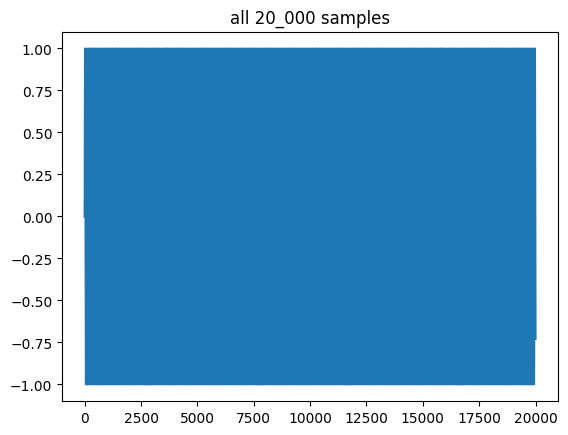

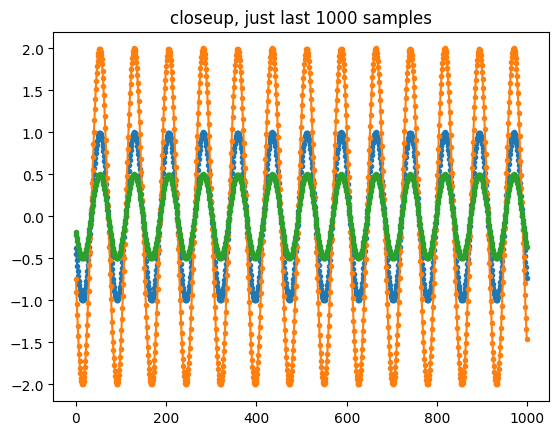

In [51]:
import matplotlib.pyplot as plt # importing another python module

s = make_tone(c_4_freq)
'''
in this case the x values are implicitly 0..n-1
where n is the length of the supplied vector
'''
plt.plot(s, '-')
plt.title('all 20_000 samples')
plt.show()
plt.plot(s[-1000:], '.-')
plt.plot(2*s[-1000:], '.-')
plt.plot(0.5*s[-1000:], '.-')
plt.title('closeup, just last 1000 samples');

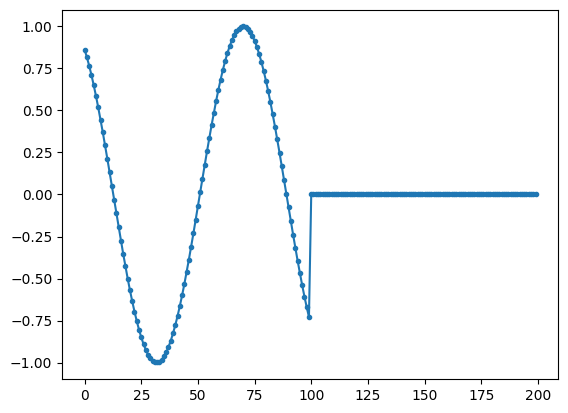

In [52]:
plt.plot(np.concatenate((s[-100:], np.zeros(100))), '.-')

### Extra: dictionaries are useful.

you can 'map' (almost) any object (including strings) to another object (here string to numpy array)

In [54]:
sounds = {} # empty dictionary
sounds["C4"] = make_tone(c_4_freq)
play_sound(sounds["C4"])

### Task 1

Implement a function which generates a whole range of tones.

> This could help: https://en.wikipedia.org/wiki/Piano_key_frequencies


Play them all in order. Do they sound okay?

> You can use the $make\_tone$ function above.

> You can return it as a tuple/array of np.arrays

Ideally create one *octave* of sounds starting from $C_4$ to $C_5$ (including the semitones like $C^{\#}_4$). You may then select only the full tones, because they may be easier to work with.

> If you don't know what that means, just try out various frequencies and create sounds from them.

> Tip: you go from one sound to the next by multiplying the frequency by something (not adding)!

> BTW. Have you ever wondered about the name of the programming language $C^{\#}$?

In [55]:
# one possible solution

def generate_octave(from_freq):
  # either use freqs or generate starting from from_freq
  #return [make_tone(from_freq * 2**(f/12)) for f in np.linspace(0, 12, 13)] # use list comprehension??
  return [make_tone(f) for f in np.geomspace(from_freq, 2*from_freq, 13)]

tones = generate_octave(c_4_freq) # tones is a list of np.arrays,
play_sound(np.concatenate(tones)) # we turn it into one long array and play it

### Task 2 (most likely for class II)

Take a couple of sounds generated in Task 1 and see/listen what happens if you
take two vectors representing two sounds and:
- multiply one by a number
- add them
- concatenate two sounds etc.

> Tip: the sound playback we use **normalizes the maximum volume** in a given sound. So even if you make the entire sound, say, twice as loud, you'll get the same playback volume. But if you make a part of the sound louder, you will hear this part louder.

> Tip: you may need to multiply/divide by a large number to hear any difference!

In [61]:
# example with multiplication
tone = make_tone(c_4_freq, 2) # creates an array of samples for 2 seconds

tone[20_000:] *= 10 # take the second half (from sample 20,000 to the end)
# *= 10 means: multiply every sample in that slice by 10

play_sound(tone) 

# so this function becomes: first half : sample amplitude, second half: 10x amplitude

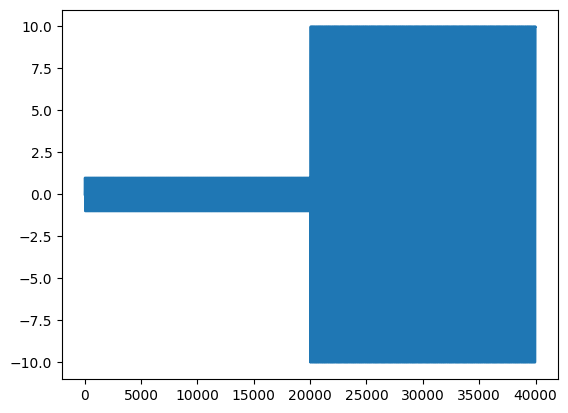

In [57]:
plt.plot(tone)

In [ ]:
tone1 = make_tone(440*2, 3)
tone2 = make_tone(440, 3)
tone3 = make_tone(220, 3)

#play_sound(tone2 + tone3 + tone1)
play_sound(np.concatenate((tone2, tone3, tone2+tone3)))


#### Concatenate (play one sound, then another)

1. tone2 is an array (say 3 seconds of 440 Hz)
2. tone 3 is another array (say 3 seconds of 220 Hz)
3. np.concatenate((tone2, ton3, tone2+tone3)) makes a long array:

first all sampled of tone 2,them all samples of tone 3,then all samples of (tone2+tone3): combined sound.

> key idea: concatenation changes the time axis (longer sound). it does not mix at the same time.

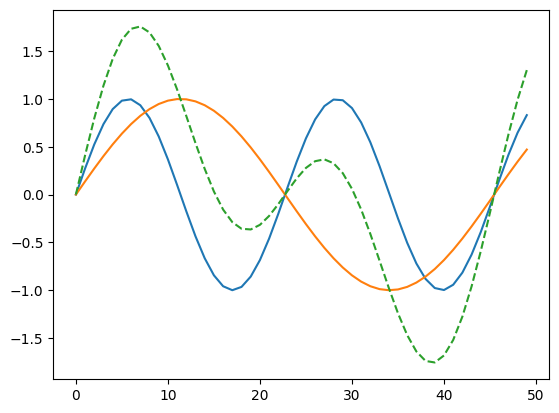

In [60]:
for t in [tone1, tone2]:
  plt.plot(t[:50])
plt.plot((tone1 + tone2)[:50], '--')

#### what this loop does?

* iterates over tone1 and tone2
* plots the first 50 samples of each
* result: two smooth sine waves (blue & orange)

### Aside: noise-cancelling headphones


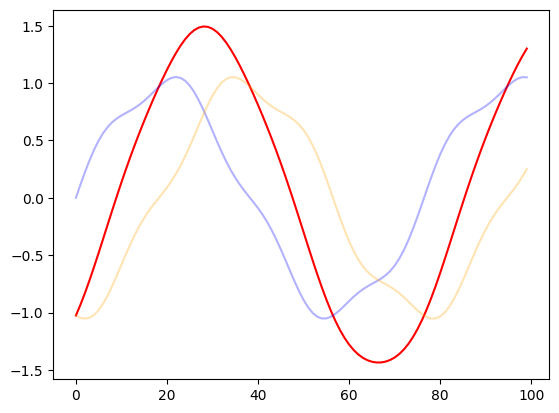

In [65]:
# making a "noise" signal

a, b = make_tone(c_4_freq), make_tone(c_4_freq*4) # a is a pure tone at C4, b is a higher-frequency tone/
env = a + b/10 # b/10 is quiter

# env = the environment noise = low tone + a bit of high-frequency junk

delay = 20
cancel = -env[delay:] # cancel is the inverted noise (-env) but shifted forward by 20 samples

k = 100
plt.plot(env[:k] + cancel[:k], color='red') # signal: env + cancel, meaning: what you ear actually hears
plt.plot(env[:k], color='blue', alpha=0.3) # signal: env, meaning; incoming noise
plt.plot(cancel[:k], color='orange', alpha=0.3) # signal: env, meaning: anti-noise (inverted + delayed)

this is a toy model of active noise cancellation (ANC) - the same basic idea your noice-canceling headphones use, but stripped down to signals and arrays.

### Task 2.5 : fix the annoying "click" at the end of each tone with make_tone


Implement a function which gets rid of this. Use it in the next tasks.

> It doesn't have to be sophisticated, but it's best if it **keeps the length of the np.array the same.**

> Tip: look one of the graphs above and think what can cause the 'click'.

> Tip: Remember that the vector you generate controls the displacement/vibration of the speaker, which in turn creates the pressure wave in the air. So try to think what happens after the last element of the vector is 'played'.

> Tip: Could you simply make the sound progressively quieter?


In [66]:
def fade_out(tone, last_n=1000):
  '''
  Return a new tone represented as an np.array so that
  the annoying click in 'tone' at the end disappears.

  Preferably, keep the length of 'tone' the same.
  '''
  new_tone = tone.copy()
  new_tone[-last_n:] *= np.linspace(1, 0, last_n)
  return new_tone

In [67]:
# for example:
some_tone = make_tone(c_4_freq)
new_tone = fade_out(some_tone, 100) # some_tone gets modified
play_sound(new_tone) # now it should sound nice

so where the "click" comes from?

when you call play_sound(tone): 
* the speaker cone follows those values sample by sample
* after the last sample, the system suddenly stops driving the speaker
* that means the signal jumps instantly from
* "some value" -> 0

that sudden jump is a discountinuity = clicks

### Task 2.6: visualize the result of your algorithm in task 2.5 using plt.plot
> it also makes sense to focus on the final part ot the sound

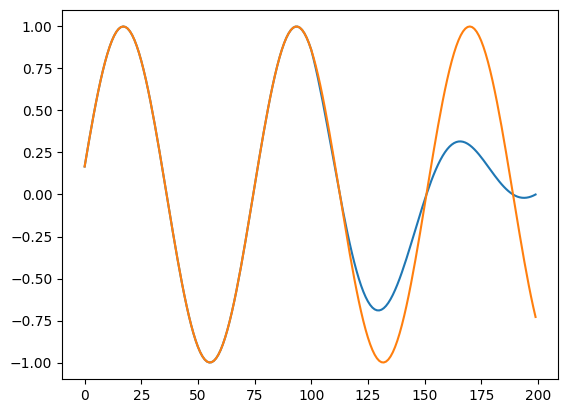

In [68]:
plt.plot(new_tone[-200:])
plt.plot(some_tone[-200:])

### Extra: how to save sound to an mp3 file!

In [69]:
# saving to mp3

!pip install pydub

import pydub

def write_mp3(f, x, sample_rate=20_000):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1

    x /= np.max(np.abs(x))
    y = np.int16(x * 2 ** 15)

    song = pydub.AudioSegment(y.tobytes(), frame_rate=sample_rate,
                              sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

# write_mp3("x.mp3", some_tone)

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


### Exercise 3 (creative solutions will be worth many activity points!)

Using previous tasks, create a short song by combining individual tones. Feel free to share on discord! Last time we had some nice sounding tunes (and other things).

It can be e.g. some childrens' song popular in whatever country you're from.

> Please post: **code, music in mp3 and explanation**.

> Tip you can also add pauses/silence

> You can also string some random tones, whatever makes some noise is okay.

> Tip: Are you limited to playing one tone at a time?

> Suggestion for an interesting take:
Each of your tones had a constant frequency. One can also create music by changing the frequency of the sound (almost) continously. https://en.wikipedia.org/wiki/Musical_saw is one example which comes to mind. Try to generate something similar.

In [1]:
import numpy as np
from IPython.display import Audio

TIMESTEPS_PER_SECOND = 40_000 # sampling rate > 20,000 numbers = 1 second of sound so 2 second sound > vector of length 40,000
# higher number = smoother sound

def make_tone(freq, duration_in_sec=1.):
    ts = np.linspace(0, np.pi*2*duration_in_sec,
                     int(TIMESTEPS_PER_SECOND * duration_in_sec))
    return np.sin(ts * freq)

'''
make_tone creates one musical note
freq = frequency pitch e.g.
440 = A
261.63 = C
duration_in_sec = how long the note lasts
np.linspace(...) creates a vector of evenly spaced numbers
np.sin(ts*freq) = creates a wave, multiplying by feq controls: hoger freq -> higher pitch
'''

def play_sound(sound):
    return Audio(sound, rate=TIMESTEPS_PER_SECOND)

def fade_out(tone, last_n=400):
    new_tone = tone.copy()
    last_n = min(last_n, len(new_tone))
    new_tone[-last_n:] *= np.linspace(1, 0, last_n)
    return new_tone

# ---- Frequencies you need (add more if needed) ----
# (These are standard equal-temperament note frequencies.)
F = {
    "C4": 261.63, "C#4": 277.18, "D4": 293.66, "D#4": 311.13, "E4": 329.63,
    "F4": 349.23, "F#4": 369.99, "G4": 392.00, "G#4": 415.30, "A4": 440.00,
    "A#4": 466.16, "B4": 493.88, "C#": 277.1826, "G3": 195.9977,
    "C3": 130.81, "D3": 146.83, "E3": 164.81, "F#3": 185.00, "G#3": 207.65, "A3": 220.00
}

def note(name, dur):
    return fade_out(make_tone(F[name], dur))

def chord(names, dur):
    x = np.zeros(int(TIMESTEPS_PER_SECOND * dur))
    for n in names:
        x += make_tone(F[n], dur)
    x /= max(1, len(names))          # prevent clipping
    return fade_out(x)

# ---- Put your melody here ----
# Example melody (replace with your sheet notes):
melody = [
    note("C#", 1.0), note("C#", 0.5), note("E4", 0.5),
    note("G#4", 0.5), note("A4", 0.5), note("F#4", 0.8),
    note("G#4", 0.2), note("E4", 1.5)
]

# ---- Put left-hand / chords here (optional) ----
# Example: simple chord progression (replace as you want):
left = [
    chord(["C3", "G#3", "C#4"], 2.0),
    chord(["A3", "E4", "A4"], 2.0),
]

melody_sound = np.concatenate(melody)
left_sound   = np.concatenate(left)

L = max(len(melody_sound), len(left_sound))

melody_sound = np.concatenate([melody_sound, np.zeros(L - len(melody_sound))])
left_sound   = np.concatenate([left_sound, np.zeros(L - len(left_sound))])

song = melody_sound + left_sound
play_sound(song)
